In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_ = 0;px_=1;ct_=2;pt_=3;
K = 100.0
U = -0.1
gamma = 1000.0

In [3]:
L = 2.0*np.pi*(gamma**2-1)**0.25/np.sqrt(K)
print(L)

19.869171564296206


In [4]:
def drift(Z,L):
    denom = np.sqrt(Z[pt_]**2-1.0-Z[px_]**2)
    Z[x_ ] = Z[x_ ] + Z[px_]/denom*L
    Z[ct_] = Z[ct_] + Z[pt_]/denom*L

    
def kick(Z,L):
    Z[px_] = Z[px_] - Z[x_]*K*L
    
    
def oneturn(Z,L,N):
    dL = L/N
    drift(Z,0.5*dL)
    kick(Z,dL)
    for i in range(N-1):
        drift(Z,dL)
        kick(Z,dL)
    drift(Z,0.5*dL)
    
    
def oneStep(Z,L):
    drift(Z,0.5*L)
    kick(Z,L)
    drift(Z,0.5*L)
    
    
def ACmap(Z,L):
    T = gamma*L/np.sqrt(gamma**2-1.0)
    w = 2*np.pi/T
    Z[px_] = Z[px_] - U*np.sin(w*Z[ct_])
    Z[pt_] = Z[pt_] + Z[x_]**w*U*np.cos(w*Z[ct_])

In [5]:
Z = np.zeros(4)
Z[x_]  = 0.001
Z[pt_] = gamma

nturn = 1000
TBT = np.zeros([nturn+1,4])
TBT[0,:] = Z
for i in range(nturn):
    oneStep(Z,L/nturn)
    TBT[i+1,:] = Z

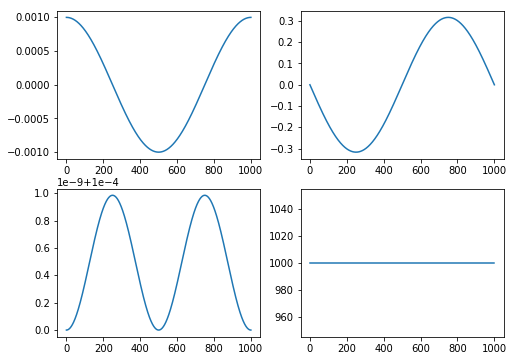

In [6]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.plot(TBT[:,x_])
plt.subplot(2,2,2)
plt.plot(TBT[:,px_])
plt.subplot(2,2,3)
plt.plot(K*TBT[:,x_]**2+TBT[:,px_]**2/np.sqrt(gamma**2-1))
plt.subplot(2,2,4)
plt.plot(TBT[:,pt_])

In [7]:
N = 100000
nturn = 1024
L = L*nturn

Z = np.zeros(4)
Z[x_]  = 0.001
Z[pt_] = gamma

TBT = np.zeros([nturn+1,4])
TBT[0,:] = Z

for i in range(nturn):
    oneturn(Z,L,N)
    ACmap(Z,L)
    TBT[i+1,:] = Z

/home/kileanhwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


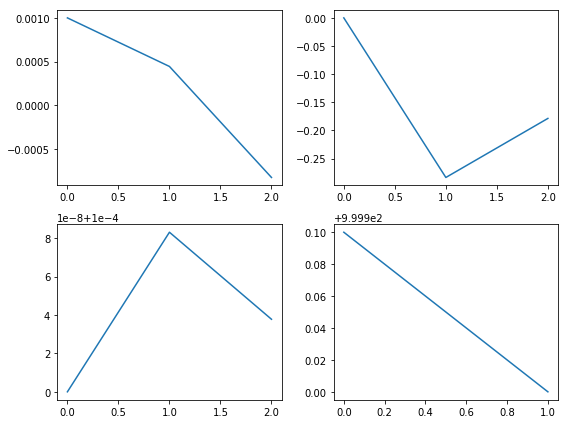

In [8]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.plot(TBT[:,x_])
plt.subplot(2,2,2)
plt.plot(TBT[:,px_])
plt.subplot(2,2,3)
plt.plot(K*TBT[:,x_]**2+TBT[:,px_]**2/np.sqrt(gamma**2-1))
plt.subplot(2,2,4)
plt.plot(TBT[:,pt_])
plt.tight_layout()